<a href="https://colab.research.google.com/github/AlvaroSeptra/alvaro-septra/blob/main/Tugas_14_Alvaro_Septra_Dominggo_Nauw.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np 
import matplotlib.pyplot as plt

Assigning a lambda fuction to convert **Number to Logaritimic**

In [ ]:
NTL = lambda n: 10*np.log10(n)

Assigning a lambda function to convert **Logaritmic to Number**

In [ ]:
LTN = lambda x: 10**(x/10)

Creating **PATHLOSS MODEL COST 231** Function

In [ ]:
def pathloss(freq,types,hgt,hrec,d):
  if freq in range(150,1501):
    Ca=69.55
    Cb=26.16
  elif freq in range(1501,2001):
    Ca=46.3
    Cb=33.9
  else:
    Ca = print("The frequency that inputed doesn't meet the C1 criteria.")
    Cb = print("The frequency that inputed doesn't meet the C2 criteria.")
    return Ca,Cb
  
  # area type
  if types == 'urban' :
    cm=0
  elif types == 'suburban' :
    cm=-2*((np.log10((freq/28)**2))-5.4)
  elif types == 'open':
    cm=-4.78*(np.log10(freq))+18.33*(np.log10(freq))-40.94
  else:
    cm=print('The given area type(s) is not suitable for this parameter')

  #ahr
  ahr = (1.1*np.log10(freq)-0.7)*hrec-(1.56*np.log10(freq)-1.8)

  #Path Loss Model
  Lp = Ca+(Cb*np.log10(freq))-(13.83*np.log10(hgt))-ahr+((44.9-6.55*np.log10(hgt))*np.log10(d))-cm
  return Lp

In [ ]:


# freq = frequency in range of 150 - 2000 MHz
# hgt = height of antenna transmitter in range of 30 - 200 m
# hrec = height of antenna receiver in range of 1 - 20 m
# d  = distance between the transmitter and receiver in m

freq1=700 #Mhz
freq2=900 #Mhz
freq3=1800 #MHz
loc1='urban'
loc2='suburban'
loc3='open'
tower=80 #m
user=1.5 #m
dmin=300 #m
dmax=1000 #m
N=200 #dots
d=np.random.randint(dmin,dmax,N)

#check
print(d) 

[861 719 543 646 612 471 303 310 468 990 497 454 589 449 765 354 743 786
 305 338 674 805 693 752 712 557 667 603 682 476 789 455 639 535 929 300
 593 937 606 549 523 838 804 750 685 507 479 323 546 371 578 615 637 796
 818 574 566 531 982 784 686 630 762 596 752 655 651 601 814 436 373 598
 494 471 892 562 818 484 713 627 438 335 548 417 883 774 348 679 974 301
 911 823 327 422 308 373 855 970 993 803 980 333 570 926 857 731 358 523
 735 478 493 301 782 842 508 890 555 413 330 643 957 814 645 978 725 829
 956 657 625 951 303 308 670 347 941 566 374 827 642 770 637 566 443 320
 773 596 654 303 519 694 480 899 451 591 740 336 568 683 751 608 409 428
 413 610 326 594 564 777 317 533 966 402 378 381 655 761 641 358 450 598
 819 318 510 475 349 671 705 716 899 861 557 922 944 945 816 470 853 515
 384 307]


In [ ]:
# Define Pathloss Cost 231 Model for Area by the given input
LpUrban=pathloss(freq3,loc1,tower,user,d)
LpSubUrban=pathloss(freq3,loc2,tower,user,d)
LpOpen=pathloss(freq3,loc3,tower,user,d)

# Sort Distance for Area 
d_sort=d[np.argsort(d)]
Urban_sort=LpUrban[np.argsort(d)]
Suburban_sort=LpSubUrban[np.argsort(d)]
Open_sort=LpOpen[np.argsort(d)]

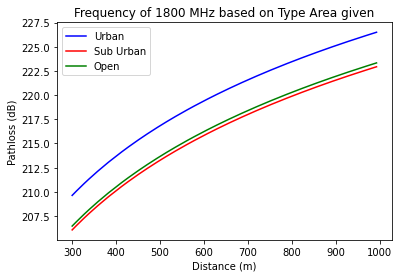

In [ ]:
fig, ax = plt.subplots()
ax.plot(d_sort,Urban_sort, color='b', label='Urban')
ax.plot(d_sort,Suburban_sort, color='r', label='Sub Urban')
ax.plot(d_sort,Open_sort, color='g', label='Open')
ax.set_title('Frequency of 1800 MHz based on Type Area given')
ax.set_xlabel('Distance (m)')
ax.set_ylabel('Pathloss (dB)')
ax.legend(loc='upper left')
plt.show()

In [ ]:
# Define Pathloss Cost 231 Model for Frequency by the given input
LpUrbanFQ1=pathloss(freq1,loc1,tower,user,d)
LpUrbanFQ2=pathloss(freq2,loc1,tower,user,d)
LpUrbanFQ3=pathloss(freq3,loc1,tower,user,d)

# Sort Distance for Area 
d_sort=d[np.argsort(d)]
UrbanFQ_sort=LpUrbanFQ1[np.argsort(d)]
UrbanFQ2_sort=LpUrbanFQ2[np.argsort(d)]
UrbanFQ3_sort=LpUrbanFQ3[np.argsort(d)]

In [ ]:
fig, ax = plt.subplots()
ax.plot(d_sort,UrbanFQ_sort, color='b', label='700 MHz')
ax.plot(d_sort,UrbanFQ2_sort, color='r', label='900 MHz')
ax.plot(d_sort,UrbanFQ3_sort, color='g', label='1800 MHz')
ax.set_title('Urban Area Model based on Frequency Area given')
ax.set_xlabel('Distance (m)')
ax.set_ylabel('Pathloss (dB)')
ax.legend(loc='upper left')
plt.show()

Creating **Power Receive Model (Prx)** function

In [ ]:
def ValuePrX(Ptx,Pl,Gtx,Grx):
  
  # Convert Transmitter Power from mW to dBm
  PtdB=NTL(Ptx)
  
  # Calculating the Value of PrX
  PrX=PtdB - Pl + Gtx + Grx

  # Convert Receiver Power from dBm to mW 
  PrXmW=LTN(PrX)

  return PrXmW

In [ ]:
# The Given Input of the Receiver Power Model for Different Area and Frequency

# tx = given transmitter power value
# pl = path loss value is derived from the prevoius calcultation model
# gtx = given transmitter gain value
# grx = given receiver gain value 

tx = 30000 # in miliwatt
Pla = Urban_sort
Plb = Suburban_sort
Plc = Open_sort
Pld = UrbanFQ_sort
Ple = UrbanFQ2_sort
Plf = UrbanFQ3_sort
gtx = 10 # in dB
grx = 2 # in dB

In [ ]:
# Define Receiver Power Model for Area by the given input
PrxUrban = ValuePrX(tx, Pla, gtx, grx)
PrxSubUrban = ValuePrX(tx, Plb, gtx, grx)
PrxOpen = ValuePrX(tx, Plc, gtx, grx)

# Define Receiver Power Model for Frequency by the given input
PrxUrban700  = ValuePrX(tx, Pld, gtx, grx)
PrxUrban900  = ValuePrX(tx, Ple, gtx, grx)
PrxUrban1800 = ValuePrX(tx, Plf, gtx, grx)

In [ ]:
fig, ax = plt.subplots()
ax.plot(d_sort,PrxUrban, color='b', label='Urban')
ax.plot(d_sort,PrxSubUrban, color='r', label='Sub Urban')
ax.plot(d_sort,PrxOpen, color='g', label='Open')
ax.set_title('Power Receive Model based on Area given')
ax.set_xlabel('Distance (m)')
ax.set_ylabel('Power Receive (mWatt)')
ax.legend(loc='upper right')
plt.show()

In [ ]:
fig, ax = plt.subplots()
ax.plot(d_sort,PrxUrban700, color='b', label='700 MHz')
ax.plot(d_sort,PrxUrban900, color='r', label='900 MHz')
ax.plot(d_sort,PrxUrban1800, color='g', label='1800 MHz')
ax.set_title('Power Receive Model based on Frequency given')
ax.set_xlabel('Distance (m)')
ax.set_ylabel('Power Receive (mWatt)')
ax.legend(loc='upper right')
plt.show()

Creating **SNR** Model

In [ ]:
def SNRValue(Prx,BW):

  # Calculating No ==> BW
  No=-174+10*np.log10(BW)

  # Converting No in BW ==> Numeric
  NoW=LTN(No)

  # Calculating SNR Value
  SNR= Prx/NoW

  return SNR

In [ ]:
# prx = receiver power value derived from the previous calculation value
# bw = the given bandwith value

Prx1 = PrxUrban
Prx2 = PrxSubUrban
Prx3 = PrxOpen
Prx4 = PrxUrban700
Prx5 = PrxUrban900
Prx6 = PrxUrban1800
BW   = 50000000

In [ ]:
# Define SNR Model for Area by the given input
SNRUrban = SNRValue(Prx1,BW)
SNRSubUrban = SNRValue(Prx2,BW)
SNROpen = SNRValue(Prx3,BW)

# Define SNR Model for Frequency by the given input
SNRUrban700 = SNRValue(Prx4,BW)
SNRUrban900 = SNRValue(Prx5,BW)
SNRUrban1800 = SNRValue(Prx6,BW)

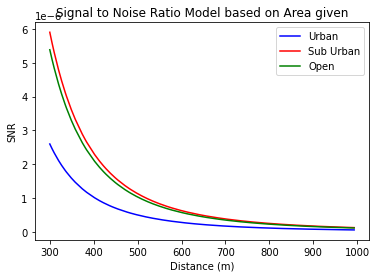

In [ ]:
fig, ax = plt.subplots()
ax.plot(d_sort,SNRUrban, color='b', label='Urban')
ax.plot(d_sort,SNRSubUrban, color='r', label='Sub Urban')
ax.plot(d_sort,SNROpen, color='g', label='Open')
ax.set_title('Signal to Noise Ratio Model based on Area given')
ax.set_xlabel('Distance (m)')
ax.set_ylabel('SNR')
ax.legend(loc='upper right')
plt.show()

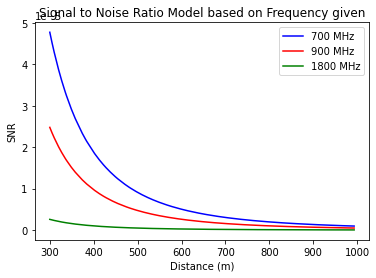

In [ ]:
fig, ax = plt.subplots()
ax.plot(d_sort,SNRUrban700, color='b', label='700 MHz')
ax.plot(d_sort,SNRUrban900, color='r', label='900 MHz')
ax.plot(d_sort,SNRUrban1800, color='g', label='1800 MHz')
ax.set_title('Signal to Noise Ratio Model based on Frequency given')
ax.set_xlabel('Distance (m)')
ax.set_ylabel('SNR')
ax.legend(loc='upper right')
plt.show()

Creating **Cell Capacity** Model

In [ ]:
def Capacity(SNR,BW):

  # Calculating Cell Capacity
  Cellcap = BW*np.log2(1+SNR)

  return Cellcap

In [ ]:
# SNR = signal to noise ratio value derived from the previous calculation value
# BW = the given bandwith value

SNR1 = SNRUrban 
SNR2 = SNRSubUrban
SNR3 = SNROpen
SNR4 = SNRUrban700
SNR5 = SNRUrban900
SNR6 = SNRUrban1800
BW   = 50000000

In [ ]:
# Define Cell Capacity Model for Area by the given input
cellcapUrban = Capacity(SNR1, BW)
cellcapSubUrban = Capacity(SNR2, BW)
cellcapOpen = Capacity(SNR3, BW)

# Define Cell Capacity Model for Frequency by the given input
cellcapUrban700 = Capacity(SNR4, BW)
cellcapUrban900 = Capacity(SNR5, BW)
cellcapUrban1800 = Capacity(SNR6, BW)

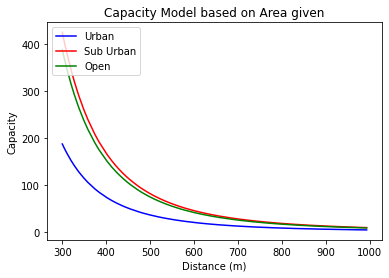

In [ ]:
fig, ax = plt.subplots()
ax.plot(d_sort,cellcapUrban, color='b', label='Urban')
ax.plot(d_sort,cellcapSubUrban, color='r', label='Sub Urban')
ax.plot(d_sort,cellcapOpen, color='g', label='Open')
ax.set_title('Capacity Model based on Area given')
ax.set_xlabel('Distance (m)')
ax.set_ylabel('Capacity')
ax.legend(loc='upper left')
plt.show()

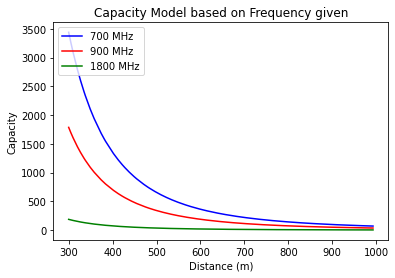

In [ ]:
fig, ax = plt.subplots()
ax.plot(d_sort,cellcapUrban700, color='b', label='700 MHz')
ax.plot(d_sort,cellcapUrban900, color='r', label='900 MHz')
ax.plot(d_sort,cellcapUrban1800, color='g', label='1800 MHz')
ax.set_title('Capacity Model based on Frequency given')
ax.set_xlabel('Distance (m)')
ax.set_ylabel('Capacity')
ax.legend(loc='upper left')
plt.show()